# Preface
Import preliminary libraries

In [1]:
import time
start = time.time()
"the code you want to test stays here"

'the code you want to test stays here'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import and manipulate the dataset: extract the spatial domain

In [3]:
!wget https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
%cd /content/
#df = pd.read_csv('/content/gdrive/MyDrive/dlku/NTP2015fire-Jan.txt', sep='\t', header=None)
df = pd.read_csv('NTP2015-2017fire.txt', sep='\t', header=None)
df.columns = ["date", "station", "addr1", "addr2", "longitude", "latitude", "township"]
df

--2021-12-30 14:01:03--  https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt [following]
--2021-12-30 14:01:04--  https://www.dropbox.com/s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3b7ebbb5d4834f9e3621a80689.dl.dropboxusercontent.com/cd/0/inline/Bc3i7dgaofe2P7uSCBkx3dZ0FxxXg6o0bVQsdchUPW5FOjAfzmSfiIXL-fQkmtu9utqdQb2GKBU0tB9gbgQhffpsYLUeRH_S0wriNAE7qfael2Lz0T5Mtp0huWMHajhqajSWMLyaQbNIDH-i-VkIYdpy/file# [following]
--2021-12-30 14:01:04--  https://uc3b7ebbb5d4834f9e3621a80689.dl.dropboxusercontent.com/cd/0/inline/Bc3i7dgaofe2P7uSCBkx3dZ0FxxXg6o0bVQsdchUPW5FOjAfzmSfiIXL-fQkmtu9ut

,date,station,addr1,addr2,longitude,latitude,township
0,2015/1/1 0:13,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015/1/1 0:16,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015/1/1 0:48,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015/1/1 0:56,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015/1/1 1:04,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
24085,2017/12/31 17:14,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017/12/31 18:40,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017/12/31 20:09,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017/12/31 20:44,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [4]:
#set date time format
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')
#extract only numerical/quantitative data
dften = df[["date", "longitude", "latitude"]]
dften

,date,longitude,latitude
0,2015-01-01 00:13:00,121.466281,25.000569
1,2015-01-01 00:16:00,121.491579,25.084172
2,2015-01-01 00:48:00,121.460224,25.136422
3,2015-01-01 00:56:00,121.450333,25.031506
4,2015-01-01 01:04:00,121.420005,24.982273
...,...,...,...
24085,2017-12-31 17:14:00,121.493909,24.990417
24086,2017-12-31 18:40:00,121.621682,25.048063
24087,2017-12-31 20:09:00,121.490806,25.076529
24088,2017-12-31 20:44:00,121.519391,24.997367


In [5]:
BBox = ((dften.longitude.min(),   dften.longitude.max(),      
         dften.latitude.min(), dften.latitude.max()))
BBox

(121.2868855, 122.0030709, 24.77511693, 25.29717505)

# Spatial Vector Heatmap Visualisation

--2021-12-30 14:01:05--  https://www.dropbox.com/s/lmser6zmvv3ulyu/ntpcmap_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lmser6zmvv3ulyu/ntpcmap_plot.png [following]
--2021-12-30 14:01:05--  https://www.dropbox.com/s/raw/lmser6zmvv3ulyu/ntpcmap_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc69167115167db739996fba4239.dl.dropboxusercontent.com/cd/0/inline/Bc1lXQTKC4QCka1l3EQttwT7WaULgcM3Xl1DdvXXDUcxx_UPAonHiHSzDVRFp91vpCz0StOgCmogi0t79n4ZMVhugO3Lv9pubdyKIAiFa1Of6F97BXzmSSxx17Mhd6aFra5de5pLyYj69gpPu-1Do2wv/file# [following]
--2021-12-30 14:01:06--  https://uc69167115167db739996fba4239.dl.dropboxusercontent.com/cd/0/inline/Bc1lXQTKC4QCka1l3EQttwT7WaULgcM3Xl1DdvXXDUcxx_UPAonHiHSzDVRFp91vpCz0StOgCmogi0

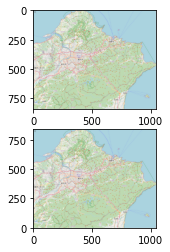

In [6]:
#download the map we have just drawn
!wget https://www.dropbox.com/s/lmser6zmvv3ulyu/ntpcmap_plot.png
map = plt.imread('ntpcmap_plot.png')
f, axarr = plt.subplots(2)
axarr[0].imshow(map)
axarr[1].imshow(map, extent=[0, 1045, 0, 842])

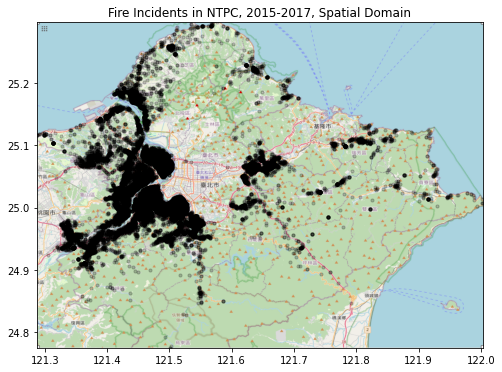

In [7]:
#let's plot the points
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(dften.longitude, dften.latitude, zorder=1, alpha= 0.2, c='k', s=10)
ax.set_title('Fire Incidents in NTPC, 2015-2017, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, extent=[BBox[0], BBox[1], BBox[2], BBox[3]])

In [8]:
#split dataframe into 3 years
df15 = df[df['date'].dt.year == 2015]
df16 = df[df['date'].dt.year == 2016]
df17 = df[df['date'].dt.year == 2017]
df15

,date,station,addr1,addr2,longitude,latitude,township
0,2015-01-01 00:13:00,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015-01-01 00:16:00,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015-01-01 00:48:00,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015-01-01 00:56:00,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015-01-01 01:04:00,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
9054,2015-12-31 21:41:00,火警-透天厝,新北市中和區大勇街25巷後面,新北市中和區大勇街29巷23弄2號,121.515367,24.994490,中和區秀明里
9055,2015-12-31 21:46:00,火警-集合住宅,新北市樹林區三福街29號;3樓,新北市樹林區三福街29號,121.408602,25.016660,樹林區三福里
9056,2015-12-31 22:37:00,火警-查看案件,新北市林口區麗園一街 派出所後 公園,新北市林口區麗園一街11巷11號,121.378654,25.070749,林口區東勢里
9057,2015-12-31 22:45:00,火警-查看案件,新北市蘆洲區中正路508巷 抽水站後,新北市蘆洲區中正路516巷10號,121.462377,25.097674,蘆洲區保新里


In [9]:
df16

,date,station,addr1,addr2,longitude,latitude,township
9059,2016-01-01 01:10:00,火警-查看案件,新北市泰山區明志路二段298巷18號之3,新北市泰山區明志路二段254巷10號,121.426283,25.047863,泰山區明志里
9060,2016-01-01 01:18:00,火警-查看案件,新北市淡水區 油車口 公園 黑店,新北市淡水區中正東路二段88巷41弄18號,121.458573,25.145268,淡水區八勢里
9061,2016-01-01 01:27:00,火警-查看案件,新北市永和區中正橋 河濱公園 白線015電塔,新北市永和區保福路二段129號,121.509767,25.013844,永和區下溪里
9062,2016-01-01 03:30:00,火警-查看案件,新北市蘆洲區三民路605號3樓,新北市蘆洲區三民路605號,121.460724,25.093751,蘆洲區南港里
9063,2016-01-01 03:47:00,火警-汽車,新北市樹林區 樹仁家商,新北市樹林區大安路216號,121.419350,24.994834,樹林區潭底里
...,...,...,...,...,...,...,...
17156,2016-12-31 19:50:00,火警-集合住宅,新北市板橋區長江路二段207號;14樓,新北市板橋區長江路二段207號,121.467488,25.032542,板橋區溪頭里
17157,2016-12-31 21:51:00,火警-查看案件,新北市板橋區 溪崑國中,新北市板橋區大觀路三段50巷30號,121.431403,24.997751,板橋區崑崙里
17158,2016-12-31 22:30:00,火警-集合住宅,新北市板橋區漢生東路23巷56弄7號;2樓 後棟,新北市板橋區漢生東路23巷56弄7號,121.466328,25.018254,板橋區新民里
17159,2016-12-31 22:52:00,火警-查看案件,新北市林口區東湖 東湖公園,新北市林口區興林一街109巷10號,121.392091,25.072460,林口區西林里


In [10]:
df17

,date,station,addr1,addr2,longitude,latitude,township
17161,2017-01-01 00:13:00,火警-山林田野(平地),新北市鶯歌區 三鶯藝術文化中,新北市鶯歌區環河路175號之8,121.346366,24.936866,鶯歌區二甲里
17162,2017-01-01 00:15:00,火警-集合住宅,新北市三峽區大同路 介壽國小,新北市三峽區永安街7號,121.377841,24.929874,三峽區介壽里
17163,2017-01-01 00:54:00,火警-集合住宅,新北市板橋區館前西路130號;2樓,新北市板橋區館前西路130號,121.456567,25.007928,板橋區流芳里
17164,2017-01-01 01:44:00,火警-集合住宅,新北市汐止區新台五路一段160號,新北市汐止區連興街121號,121.653837,25.062100,汐止區文化里
17165,2017-01-01 01:59:00,火警-警報器作響,新北市汐止區鄉長路一段55巷6號,新北市汐止區鄉長路一段55巷6號,121.665361,25.076035,汐止區建成里
...,...,...,...,...,...,...,...
24085,2017-12-31 17:14:00,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017-12-31 18:40:00,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017-12-31 20:09:00,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017-12-31 20:44:00,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


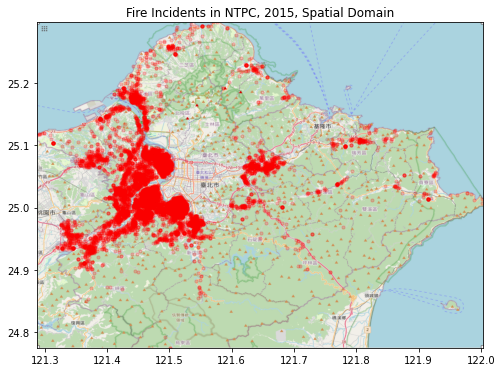

In [11]:
#let's plot the points for 2015
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df15.longitude, df15.latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Fire Incidents in NTPC, 2015, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, extent=[BBox[0], BBox[1], BBox[2], BBox[3]])

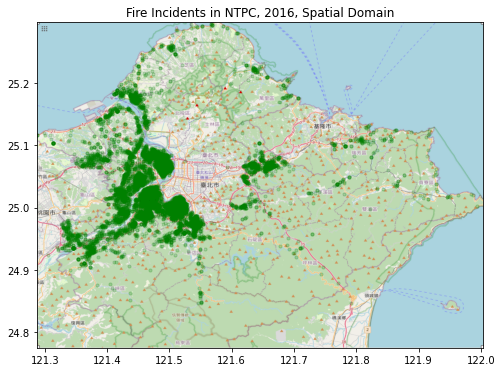

In [12]:
#let's plot the points for 2016
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df16.longitude, df16.latitude, zorder=1, alpha= 0.2, c='g', s=10)
ax.set_title('Fire Incidents in NTPC, 2016, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, extent=[BBox[0], BBox[1], BBox[2], BBox[3]])

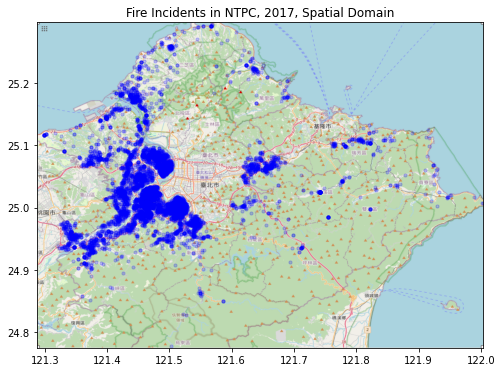

In [13]:
#let's plot the points for 2017
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df17.longitude, df17.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Fire Incidents in NTPC, 2017, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, extent=[BBox[0], BBox[1], BBox[2], BBox[3]])

In [14]:
#Extraction of the temporal domain
maxlimit = len(df)
ones = np.ones(maxlimit, dtype="uint32")
dftemp = pd.DataFrame(df.date)
dftemp['freq'] = ones
dftemp

,date,freq
0,2015-01-01 00:13:00,1
1,2015-01-01 00:16:00,1
2,2015-01-01 00:48:00,1
3,2015-01-01 00:56:00,1
4,2015-01-01 01:04:00,1
...,...,...
24085,2017-12-31 17:14:00,1
24086,2017-12-31 18:40:00,1
24087,2017-12-31 20:09:00,1
24088,2017-12-31 20:44:00,1


In [15]:
#when running this block, we will obtain the monthly frequency to be used in the temporal domain (a.k.a. time series).
dftempday = dftemp.groupby(pd.Grouper(key="date", freq="1D")).count()
dftempweek = dftemp.groupby(pd.Grouper(key="date", freq="1W")).count()
dftempmonth = dftemp.groupby(pd.Grouper(key="date", freq="1M")).count()

In [16]:
dftempday

,freq
date,
2015-01-01,34
2015-01-02,25
2015-01-03,24
2015-01-04,34
2015-01-05,28
...,...
2017-12-27,13
2017-12-28,19
2017-12-29,19


In [17]:
dftempweek

,freq
date,
2015-01-04,117
2015-01-11,163
2015-01-18,141
2015-01-25,210
2015-02-01,174
...,...
2017-12-03,125
2017-12-10,109
2017-12-17,105


In [18]:
dftempmonth.head()

,freq
date,
2015-01-31,778
2015-02-28,776
2015-03-31,733
2015-04-30,844
2015-05-31,681


In [19]:
dftempmonth.tail()

,freq
date,
2017-08-31,740
2017-09-30,576
2017-10-31,527
2017-11-30,553
2017-12-31,506


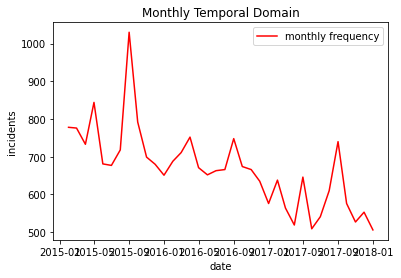

In [20]:
y = dftempmonth['freq']
x = dftempmonth.index
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(x, y, color='r', label='monthly frequency') 
plt.xlabel('date')
plt.ylabel('incidents')
plt.title('Monthly Temporal Domain')
plt.legend() 
plt.show()

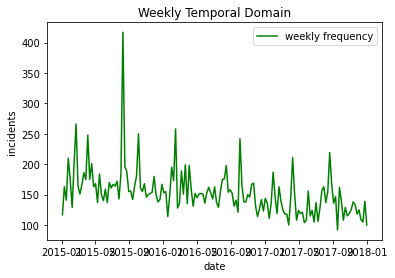

In [21]:
y = dftempweek['freq']
x = dftempweek.index
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(x, y, color='g', label='weekly frequency')
plt.xlabel('date')
plt.ylabel('incidents')
plt.title('Weekly Temporal Domain')
plt.legend() 
plt.show()

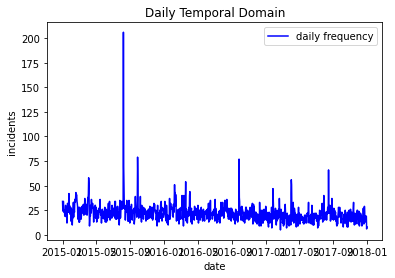

In [22]:
y = dftempday['freq']
x = dftempday.index
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(x, y, color='b', label='daily frequency') 
plt.xlabel('date')
plt.ylabel('incidents')
plt.title('Daily Temporal Domain')
plt.legend() 
plt.show()

# Map rasterisation

In [23]:
BBox

(121.2868855, 122.0030709, 24.77511693, 25.29717505)

In [24]:
def cytogenesis(df, nc, mapedges):
  #def calculate_cellsize(nc, mapedges):
  def calculate_cellsize():
    global lonmin
    global lonmax
    global latmin
    global latmax
    lonmin = mapedges[0]
    lonmax = mapedges[1]
    latmin = mapedges[2]
    latmax = mapedges[3]
    global csize_lon
    global csize_lat
    csize_lon = (lonmax - lonmin)/nc
    csize_lat = (latmax - latmin)/nc
    #print(csize_lon)
    #print(csize_lat)
    return csize_lon, csize_lat, lonmin, lonmax, latmin, latmax

  #call the 1st subfunction
  #csize_lon, csize_lat = calculate_cellsize(nc, mapedges)
  csize_lon, csize_lat, lonmin, lonmax, latmin, latmax = calculate_cellsize()
  
  #def draw_lines(nc,csize_lon,csize_lat):
  def draw_lines():
    global pixgrade_lon_left
    global pixgrade_lon_right
    global pixgrade_lat_bottom
    global pixgrade_lat_top

    pixgrade_lon_left = np.zeros(nc, dtype="float64")
    pixgrade_lon_right = np.zeros(nc, dtype="float64")
    pixgrade_lat_bottom = np.zeros(nc, dtype="float64")
    pixgrade_lat_top = np.zeros(nc, dtype="float64")
    #draw block boundaries
    for i in range (0,nc,1):

      pixgrade_lon_left[i] = lonmin + ((i)*(csize_lon))
      pixgrade_lon_right[i] = lonmin + ((i+1)*(csize_lon))
      pixgrade_lat_bottom[i] = latmin + ((i)*(csize_lat))
      pixgrade_lat_top[i] = latmin + ((i+1)*(csize_lat))
    
    #print(pixgrade_lon_left)
    #print(pixgrade_lon_right)
    #print(pixgrade_lat_bottom)
    #print(pixgrade_lat_top)
    return pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top

  #pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top = draw_lines(nc,csize_lon,csize_lat)
  pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top = draw_lines()

  #def cell_loader(df, nc, csize_lon, csize_lat, pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top):
  def cell_loader():  
    #create a board
    block = np.zeros((nc, nc), dtype="float32")
    point = np.zeros([len(df),2])

    for i in range (0,len(df),1):
      point[i,0] = df.longitude[i]
      point[i,1] = df.latitude[i]
      #the inner nested loop considers where to place each point into a cell
      for j in range (0,nc,1):
        for k in range (0,nc,1):
          if ((point[i,0] >= pixgrade_lon_left[j]) & (point[i,0] < pixgrade_lon_right[j]) & (point[i,1] >= pixgrade_lat_bottom[k]) & (point[i,1] < pixgrade_lat_top[k])):
            block[j,k] += 1
    #orgaise the cell tablet for proper visualisation
    global bq
    bq = np.rot90(block, k=1)
    bq = bq.astype(np.uint8)

    def heatmap2d(arr: np.ndarray):
      plt.imshow(arr, cmap='viridis')
      plt.colorbar()
      plt.show()

    #heatmap2d(bq) #call this function to visualise raster heatmaps
    return bq

  bq = cell_loader()
  return bq

#cytogenesis(dften, 28, BBox)

In [25]:
def dozenisation(dff, BBox=BBox):

  figtensor = np.zeros([12,28,28])
  for i in range(0,12,1):
    timeframe = (dff['date'].dt.month == i+1)
    df00 = dff.loc[timeframe]
    df00 = df00.reset_index(drop=True)
    df00.head()
    fig0 = cytogenesis(df00, 28, BBox)
    figtensor[i] = fig0
  return figtensor

figtensor15 = dozenisation(df15)
figtensor16 = dozenisation(df16)
figtensor17 = dozenisation(df17)
figtensor = np.concatenate((figtensor15, figtensor16, figtensor17), axis=0)

In [26]:
figtensor.shape

(36, 28, 28)

In [27]:
maxcolour = figtensor.max()
maxcolour

44.0

Then, we are ready to view the rasterised heatmaps

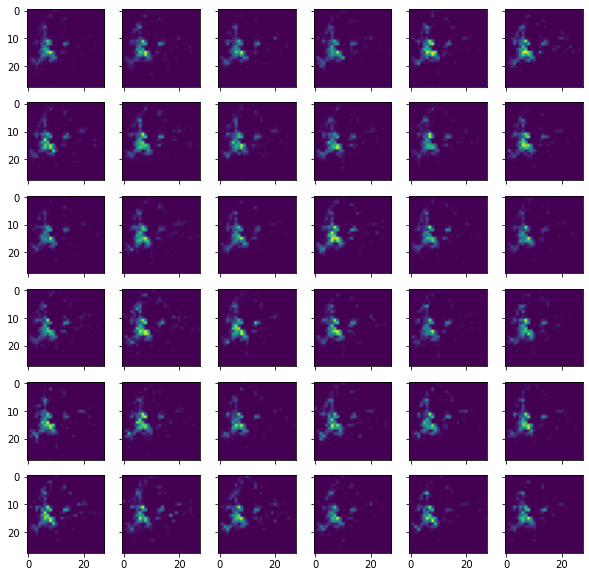

In [28]:
rows = 6; cols = 6;
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 10), squeeze=0, sharex=True, sharey=True)
axes = np.array(axes)

for i, ax in enumerate(axes.reshape(-1)):
  ax.imshow(figtensor[i])

In [29]:
def ttsplit(dataarray):
  trainarr = np.zeros([24,28,28], dtype='uint8')
  testarr = np.zeros([12,28,28], dtype='uint8')
  j = 0
  k = 0
  for i in range (0, len(dataarray), 1):
    if (i % 3 == 2):
      testarr[j,:,:] = dataarray[i,:,:]
      j+=1
    else:
      trainarr[k,:,:] = dataarray[i,:,:]
      k+=1
  return trainarr, testarr

#define this function below to brighten the picture when visualised, Before the picdata enters the model, normalise them first in the next block.
#When the picture data leaves the model, revert the normalisation when visualising, unless the plt.imshow section is built-in:
#For sigmoid, multiply the model product tensor with figtensor.max, which is 44. For tanh, plus each individual product pixel by 1, and multiply with 
def relative_normalisation(nparray):
  maxcolour = figtensor.max()
  coeff = (255 / maxcolour)
  nparray = nparray.astype('float32')
  new_arr = nparray * coeff
  return new_arr

traindata, testdata = ttsplit(figtensor)
trainarr = relative_normalisation(traindata)
testarr = relative_normalisation(testdata)

Then we can view both datasets

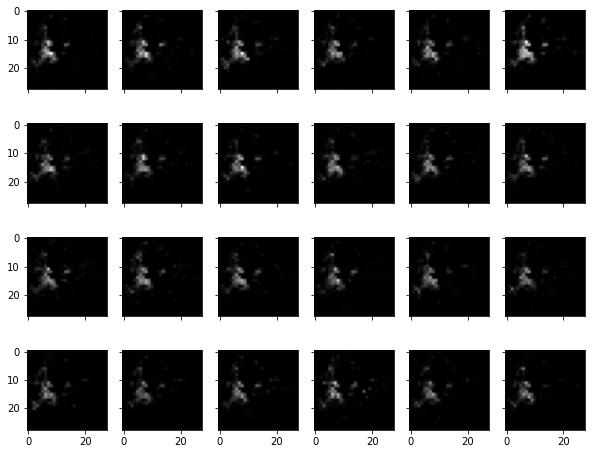

In [30]:
rows = 4; cols = 6;
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 8), squeeze=0, sharex=True, sharey=True)
axes = np.array(axes)

for i, ax in enumerate(axes.reshape(-1)):
  ax.imshow(trainarr[i], cmap='gray', vmin=0, vmax=255)

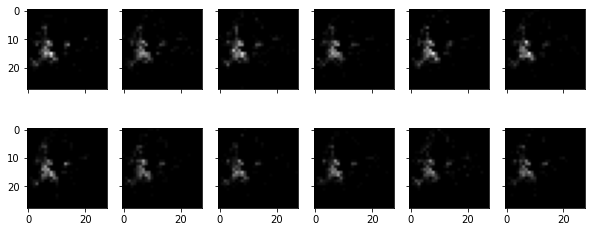

In [31]:
rows = 2; cols = 6;
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 4), squeeze=0, sharex=True, sharey=True)
axes = np.array(axes)

for i, ax in enumerate(axes.reshape(-1)):
  ax.imshow(testarr[i], cmap='gray', vmin=0, vmax=255)

In [32]:
#Choose either function below
def sigmoid_normalisation(nparray, maxcolour=255): #In autoencoders, the last (output layer's) activation function is in the decoder
  maxcolour = float(maxcolour)        #in this case, it's sigmoid [0,1]
  nparray = nparray.astype('float32')
  new_arr = nparray / maxcolour
  return new_arr

def tanh_normalisation(nparray, maxcolour=255): #In GANs, the last (output layer's) activation function is in the generator
  maxcolour = float(maxcolour)      #in this case, it's tanh [-1,1]
  halfbound = float(maxcolour / 2)
  nparray = nparray.astype('float32')
  new_arr = (nparray - halfbound) / halfbound
  return new_arr

#unlike earlier codes, you will need to enter maxcolour, which is figtensor.max(), or else 255
trainarray = sigmoid_normalisation(trainarr)
testarray = tanh_normalisation(testarr)

print(trainarray.shape)
print(testarray.shape)
print(trainarray.min(),"//", trainarray.max())
print(testarray.min(), "//",testarray.max())

(24, 28, 28)
(12, 28, 28)
0.0 // 1.0
-1.0 // 0.8636363


In [33]:
end = time.time()
print(end - start)

71.49479985237122
